In [1]:
data <- read.csv("https://raw.githubusercontent.com/kleban/ml-r-source/refs/heads/main/data/bikes.csv")
data |> head()

             datetime season holiday workingday weather temp  atemp humidity windspeed
1 2011-01-01 00:00:00      1       0          0       1 9.84 14.395       81    0.0000
2 2011-01-01 01:00:00      1       0          0       1 9.02 13.635       80    0.0000
3 2011-01-01 02:00:00      1       0          0       1 9.02 13.635       80    0.0000
4 2011-01-01 03:00:00      1       0          0       1 9.84 14.395       75    0.0000
5 2011-01-01 04:00:00      1       0          0       1 9.84 14.395       75    0.0000
6 2011-01-01 05:00:00      1       0          0       2 9.84 12.880       75    6.0032
  casual registered count
1      3         13    16
2      8         32    40
3      5         27    32
4      3         10    13
5      0          1     1
6      0          1     1

In [5]:
anyNA(data)

[1] FALSE

In [6]:
data$season <- factor(data$season)
data$holiday <- factor(data$holiday)
data$workingday <- factor(data$workingday)
data$weather <- factor(data$weather)
data$holiday <- factor(data$holiday)

head(data)

             datetime season holiday workingday weather temp  atemp humidity windspeed casual registered count
1 2011-01-01 00:00:00      1       0          0       1 9.84 14.395       81    0.0000      3         13    16
2 2011-01-01 01:00:00      1       0          0       1 9.02 13.635       80    0.0000      8         32    40
3 2011-01-01 02:00:00      1       0          0       1 9.02 13.635       80    0.0000      5         27    32
4 2011-01-01 03:00:00      1       0          0       1 9.84 14.395       75    0.0000      3         10    13
5 2011-01-01 04:00:00      1       0          0       1 9.84 14.395       75    0.0000      0          1     1
6 2011-01-01 05:00:00      1       0          0       2 9.84 12.880       75    6.0032      0          1     1

In [7]:
library(dplyr)
data <- data %>% select(-c(casual, registered))
head(data)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



             datetime season holiday workingday weather temp  atemp humidity windspeed count
1 2011-01-01 00:00:00      1       0          0       1 9.84 14.395       81    0.0000    16
2 2011-01-01 01:00:00      1       0          0       1 9.02 13.635       80    0.0000    40
3 2011-01-01 02:00:00      1       0          0       1 9.02 13.635       80    0.0000    32
4 2011-01-01 03:00:00      1       0          0       1 9.84 14.395       75    0.0000    13
5 2011-01-01 04:00:00      1       0          0       1 9.84 14.395       75    0.0000     1
6 2011-01-01 05:00:00      1       0          0       2 9.84 12.880       75    6.0032     1

In [8]:
data %>%
 select(temp:count) %>% 
 cor() %>%
 as.data.frame()

                 temp       atemp    humidity   windspeed      count
temp       1.00000000  0.98494811 -0.06494877 -0.01785201  0.3944536
atemp      0.98494811  1.00000000 -0.04353571 -0.05747300  0.3897844
humidity  -0.06494877 -0.04353571  1.00000000 -0.31860699 -0.3173715
windspeed -0.01785201 -0.05747300 -0.31860699  1.00000000  0.1013695
count      0.39445364  0.38978444 -0.31737148  0.10136947  1.0000000

In [9]:
data %>%
 group_by(season) %>%
 summarize(n = n())

# A tibble: 4 × 2
  season     n
  <fct>  <int>
1 1       2686
2 2       2733
3 3       2733
4 4       2734

Use suppressPackageStartupMessages() to eliminate package startup messages


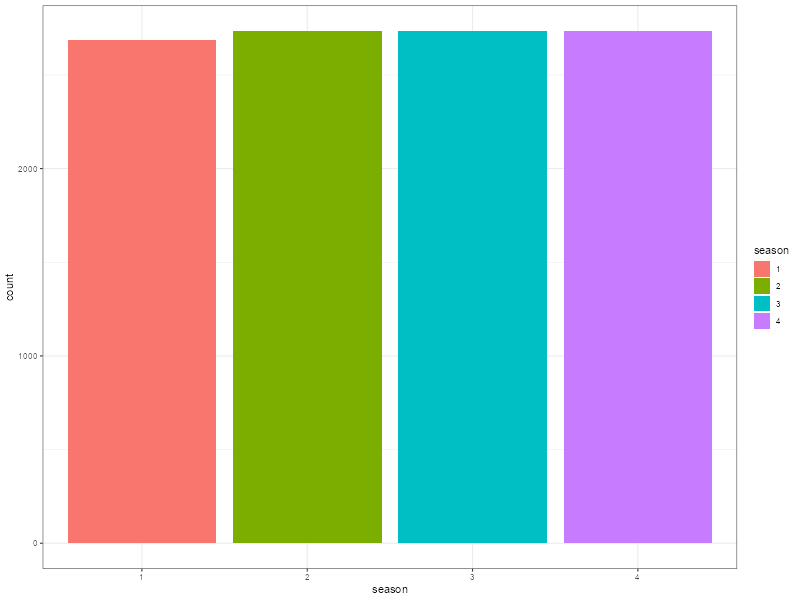

In [10]:
library(ggplot2)
# llok like we have almost the same count by each season
ggplot(data, aes(season)) + 
    geom_bar(aes(fill = season)) + 
    theme_bw()

In [12]:
data %>%
 group_by(holiday) %>%
 summarize(n = n())

# A tibble: 2 × 2
  holiday     n
  <fct>   <int>
1 0       10575
2 1         311

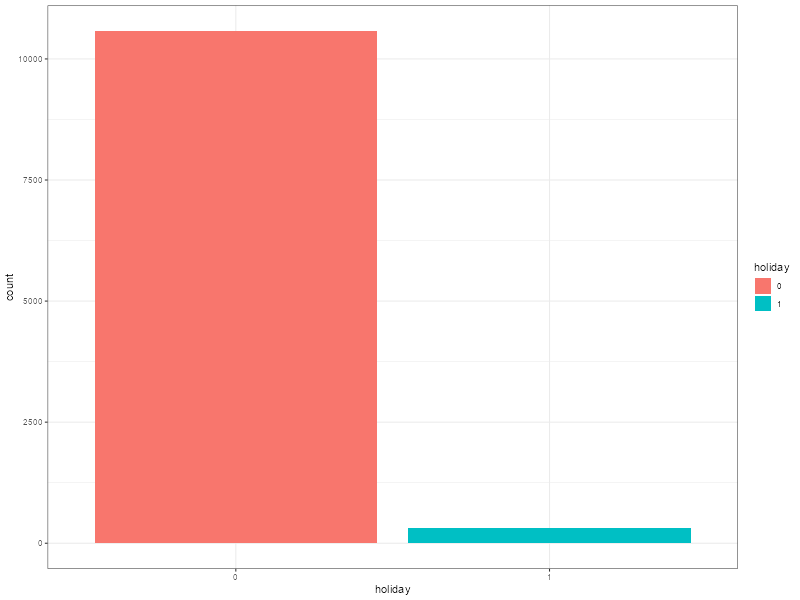

In [13]:
ggplot(data, aes(holiday)) + geom_bar(aes(fill = holiday)) + theme_bw()

In [14]:
data %>%
 group_by(workingday) %>%
 summarize(n = n())

# A tibble: 2 × 2
  workingday     n
  <fct>      <int>
1 0           3474
2 1           7412

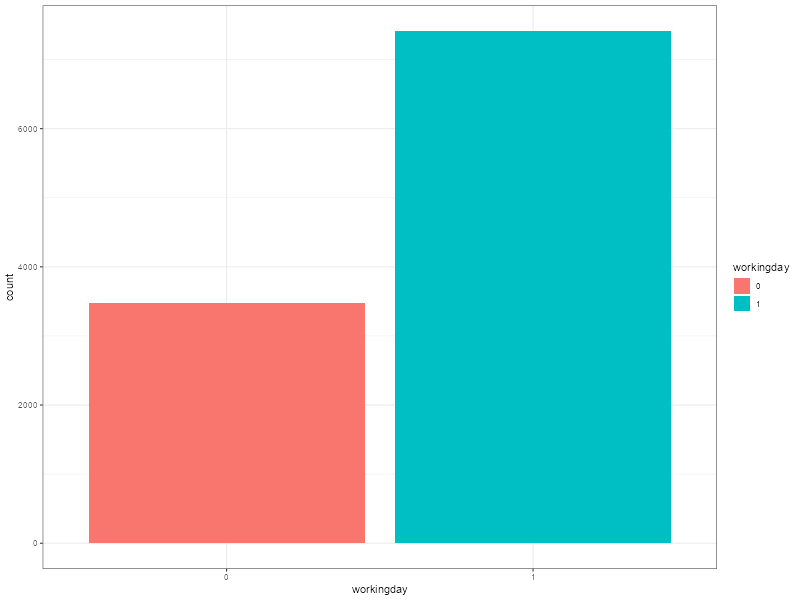

In [15]:
ggplot(data, aes(workingday)) + geom_bar(aes(fill = workingday)) + theme_bw()

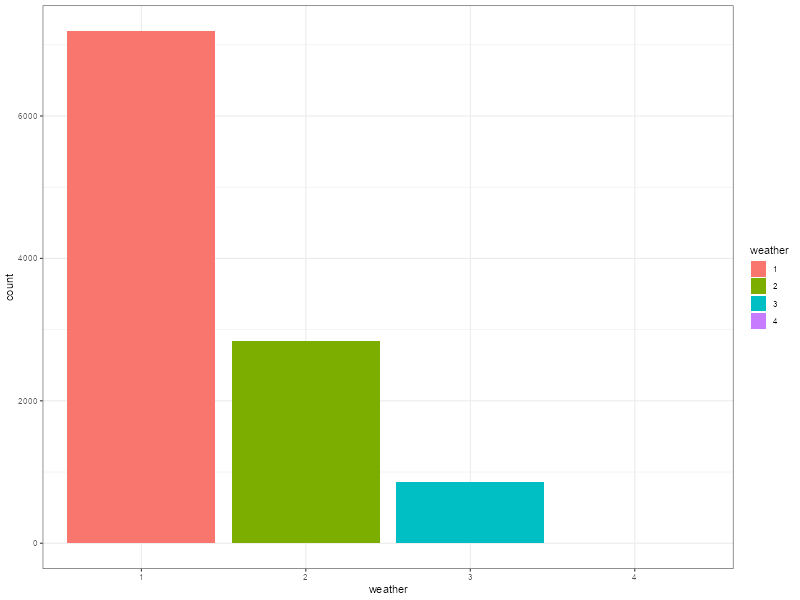

In [16]:
ggplot(data, aes(weather)) + geom_bar(aes(fill = weather)) + theme_bw()

weather
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

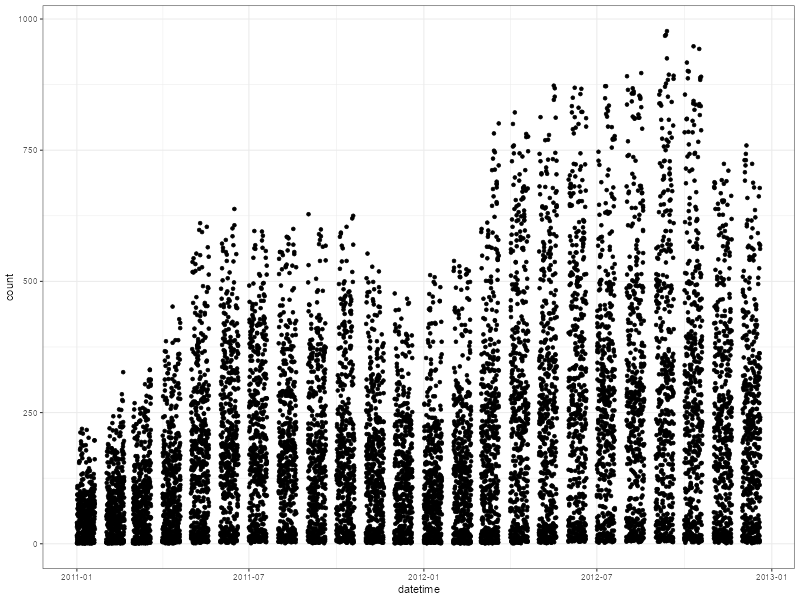

In [18]:
data$datetime <- as.POSIXct(data$datetime)
ggplot(data, aes(datetime, count)) + geom_point() + theme_bw()

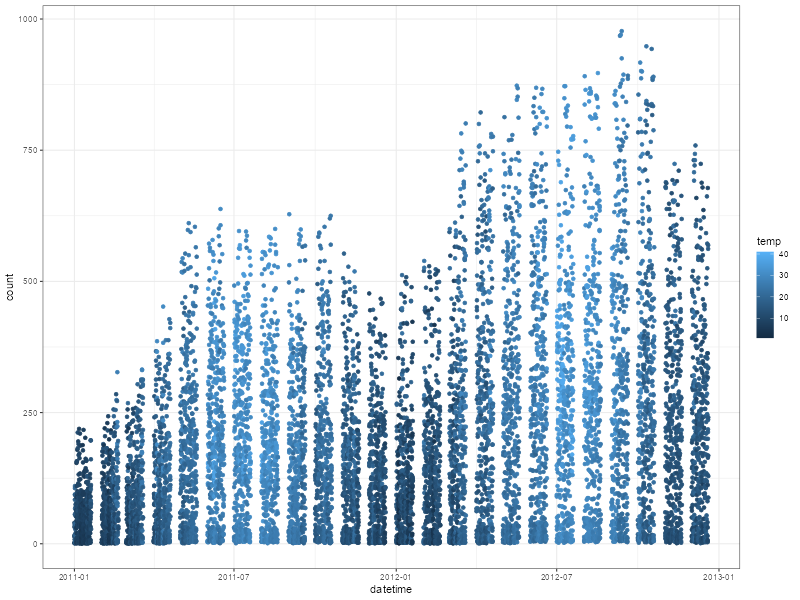

In [19]:
ggplot(data, aes(datetime, count)) + geom_point(aes(color=temp)) + theme_bw()

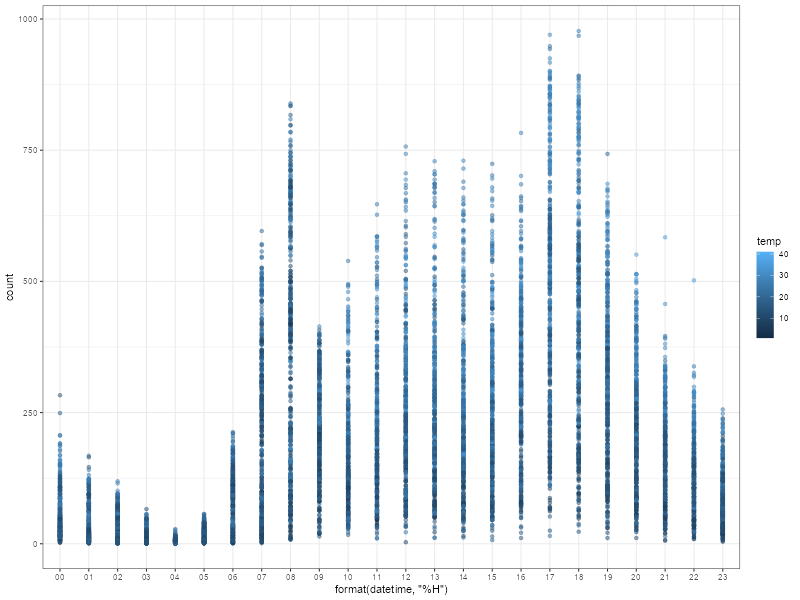

In [20]:
ggplot(data, aes(format(datetime, "%H"), count)) + 
        geom_point(aes(color=temp), alpha = 0.5) + 
        theme_bw()

In [21]:
data <- data %>%
    mutate(hour_rent = as.numeric(format(datetime, "%H")))
head(data)

             datetime season holiday workingday weather temp  atemp humidity windspeed count hour_rent
1 2011-01-01 00:00:00      1       0          0       1 9.84 14.395       81    0.0000    16         0
2 2011-01-01 01:00:00      1       0          0       1 9.02 13.635       80    0.0000    40         1
3 2011-01-01 02:00:00      1       0          0       1 9.02 13.635       80    0.0000    32         2
4 2011-01-01 03:00:00      1       0          0       1 9.84 14.395       75    0.0000    13         3
5 2011-01-01 04:00:00      1       0          0       1 9.84 14.395       75    0.0000     1         4
6 2011-01-01 05:00:00      1       0          0       2 9.84 12.880       75    6.0032     1         5

In [24]:
set.seed(2025) 

train_count = ceiling(0.7 * nrow(data))
print(train_count)

[1] 7621


In [25]:
test_count = nrow(data) - train_count
print(test_count)

[1] 3265


In [26]:
data <- data %>% arrange(datetime)
train_data <- data %>% slice_head(n = train_count)
nrow(train_data)
test_data <- data %>% slice_tail(n = test_count)
nrow(test_data)

[1] 3265

In [28]:
head(test_data)

             datetime season holiday workingday weather  temp  atemp humidity windspeed count hour_rent
1 2012-05-16 22:00:00      2       0          1       1 26.24 30.305       73   11.0014   286        22
2 2012-05-16 23:00:00      2       0          1       1 25.42 29.545       78    7.0015   133        23
3 2012-05-17 00:00:00      2       0          1       1 24.60 28.790       78    8.9981    79         0
4 2012-05-17 01:00:00      2       0          1       1 24.60 28.030       83   11.0014    28         1
5 2012-05-17 02:00:00      2       0          1       1 24.60 28.790       78   11.0014    16         2
6 2012-05-17 03:00:00      2       0          1       1 24.60 29.545       73   16.9979     3         3

In [27]:
tail(train_data)

                datetime season holiday workingday weather  temp  atemp humidity windspeed count hour_rent
7616 2012-05-16 16:00:00      2       0          1       1 29.52 32.575       45    7.0015   446        16
7617 2012-05-16 17:00:00      2       0          1       1 29.52 33.335       51   12.9980   873        17
7618 2012-05-16 18:00:00      2       0          1       1 29.52 33.335       51   15.0013   846        18
7619 2012-05-16 19:00:00      2       0          1       1 28.70 32.575       54   19.0012   590        19
7620 2012-05-16 20:00:00      2       0          1       1 27.06 31.060       65   16.9979   459        20
7621 2012-05-16 21:00:00      2       0          1       1 26.24 30.305       73   12.9980   393        21

In [29]:
lm_bike <- lm(count ~ atemp, train_data)
summary(lm_bike)


Call:
lm(formula = count ~ atemp, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-254.42  -93.91  -27.43   65.57  648.09 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.0774     4.4973  -0.462    0.644    
atemp         7.2602     0.1895  38.311   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 138.4 on 7619 degrees of freedom
Multiple R-squared:  0.1615,	Adjusted R-squared:  0.1614 
F-statistic:  1468 on 1 and 7619 DF,  p-value: < 2.2e-16


In [30]:
lm_bike <- lm(count~.-datetime, train_data)
summary(lm_bike)


Call:
lm(formula = count ~ . - datetime, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-283.67  -78.72  -25.68   46.27  587.17 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  15.67996    8.85332   1.771   0.0766 .  
season2       9.39674    4.59288   2.046   0.0408 *  
season3     -40.29356    6.46891  -6.229 4.95e-10 ***
season4      21.14562    4.40422   4.801 1.61e-06 ***
holiday1     -8.46508    8.79408  -0.963   0.3358    
workingday1  -4.89327    3.12276  -1.567   0.1172    
weather2      2.76675    3.47283   0.797   0.4257    
weather3    -31.30849    5.61763  -5.573 2.59e-08 ***
weather4     85.56066  122.62585   0.698   0.4854    
temp          1.34075    1.67470   0.801   0.4234    
atemp         6.30809    1.48446   4.249 2.17e-05 ***
humidity     -1.49856    0.08884 -16.868  < 2e-16 ***
windspeed     0.35086    0.19131   1.834   0.0667 .  
hour_rent     6.20760    0.21640  28.685  < 2e-16 ***
---
Signif. codes:  

In [31]:
library(car)
vif(lm_bike)

Loading required package: carData

Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

    recode



                GVIF Df GVIF^(1/(2*Df))
season      2.941744  3        1.197018
holiday     1.076162  1        1.037382
workingday  1.072163  1        1.035453
weather     1.291207  3        1.043516
temp       83.073739  1        9.114480
atemp      78.281362  1        8.847676
humidity    1.594124  1        1.262586
windspeed   1.331723  1        1.154003
hour_rent   1.135437  1        1.065569

In [32]:
lm_bike <- lm(count~.-datetime-atemp, train_data)
summary(lm_bike)


Call:
lm(formula = count ~ . - datetime - atemp, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-297.02  -79.11  -25.60   46.35  585.12 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  26.97221    8.45456   3.190  0.00143 ** 
season2       9.25257    4.59790   2.012  0.04422 *  
season3     -45.22396    6.37114  -7.098 1.38e-12 ***
season4      22.00064    4.40455   4.995 6.02e-07 ***
holiday1    -11.34365    8.77778  -1.292  0.19629    
workingday1  -4.86349    3.12625  -1.556  0.11982    
weather2      3.02977    3.47616   0.872  0.38346    
weather3    -32.19037    5.62008  -5.728 1.06e-08 ***
weather4     88.33390  122.76150   0.720  0.47182    
temp          8.34447    0.29736  28.062  < 2e-16 ***
humidity     -1.47674    0.08879 -16.632  < 2e-16 ***
windspeed     0.06683    0.17945   0.372  0.70959    
hour_rent     6.20731    0.21665  28.652  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [33]:
lm_bike <- lm(count~.-datetime-temp, train_data)
summary(lm_bike)


Call:
lm(formula = count ~ . - datetime - temp, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-284.34  -78.54  -25.58   46.54  587.56 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  14.10823    8.63270   1.634   0.1022    
season2       9.83794    4.55959   2.158   0.0310 *  
season3     -38.69645    6.15348  -6.289 3.38e-10 ***
season4      21.18092    4.40389   4.810 1.54e-06 ***
holiday1     -7.94972    8.77028  -0.906   0.3647    
workingday1  -4.87545    3.12260  -1.561   0.1185    
weather2      2.73928    3.47257   0.789   0.4302    
weather3    -31.13383    5.61326  -5.546 3.01e-08 ***
weather4     84.87954  122.62000   0.692   0.4888    
atemp         7.47769    0.26328  28.402  < 2e-16 ***
humidity     -1.50427    0.08855 -16.988  < 2e-16 ***
windspeed     0.40415    0.17935   2.253   0.0243 *  
hour_rent     6.21361    0.21627  28.731  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
